In [1]:
#importing libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten


In [2]:
count=0
dirs = os.listdir('Train')
for dir in dirs:
    # Make sure to properly join the paths with os.path.join
    files = list(os.listdir(os.path.join('Train', dir)))
    print(f"{dir} folder has {len(files)} files.")
    count=count+len(files)
print('Images folder has '+ str(count) + ' Train')


daisy folder has 759 files.
dandelion folder has 1052 files.
rose folder has 785 files.
sunflower folder has 734 files.
tulip folder has 985 files.
Images folder has 4315 Train


In [3]:
#Load Images into Arrays as Dataset
base_dir='Train'
img_size=180
batch=32

In [4]:
train_ds=tf.keras.utils.image_dataset_from_directory(base_dir,seed=123,validation_split=0.2,
                                                     subset='training',batch_size=batch,
                                                     image_size=(img_size,img_size))

val_ds=tf.keras.utils.image_dataset_from_directory(base_dir,seed=123,validation_split=0.2,
                                                     subset='validation',batch_size=batch,
                                                     image_size=(img_size,img_size))



Found 4322 files belonging to 5 classes.
Using 3458 files for training.
Found 4322 files belonging to 5 classes.
Using 864 files for validation.


In [5]:
flower_names=train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [6]:
import matplotlib.pyplot as plt

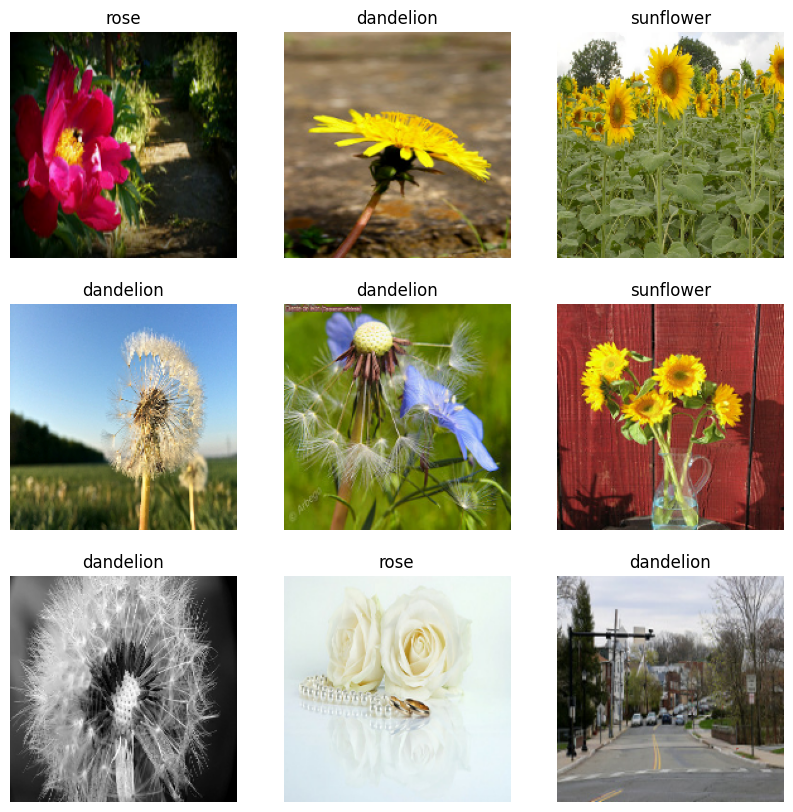

In [7]:
i=0
plt.figure(figsize=(10,10))
for images,lables in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[lables[i]])
        plt.axis('off')
        
    

In [8]:
AUTOTUNE=tf.data.AUTOTUNE

In [9]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [11]:
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
#Data Augmentation
data_augmentation=Sequential([layers.RandomFlip('horizontal',input_shape=(img_size,img_size)),
                              layers.RandomRotation(0.1),layers.RandomZoom(0.1)])

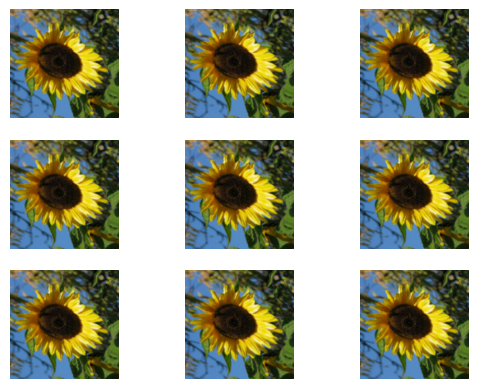

In [12]:
# Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Load and preprocess images from dataset
for images, labels in train_ds.take(1):
    images = tf.image.resize(images, [224, 224])  # Resize images to standard size
    images = data_augmentation(images)  # Apply augmentation
    for i in range(9):  # Display augmented images
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[0].numpy().astype("uint8"))
        plt.axis("off")


In [15]:
#Model creation
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling2D(),  # Global Average Pooling to reduce dimensions
    layers.Dense(128, activation='relu'),
    layers.Dense(5)  # Number of output classes
])
    

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [17]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 224, 224, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 112, 112, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 112, 112, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 56, 56, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 56, 56, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 28, 28, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 28, 28, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (32, 64)                    │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 128)                   │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 5)                     │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,549 (127.14 KB)

 Trainable params: 32,549 (127.14 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 19s 155ms/step - accuracy: 0.2367 - loss: 1.5785 - val_accuracy: 0.4132 - val_loss: 1.2896
Epoch 2/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 19s 177ms/step - accuracy: 0.4227 - loss: 1.2880 - val_accuracy: 0.4896 - val_loss: 1.1667
Epoch 3/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - accuracy: 0.4646 - loss: 1.2153 - val_accuracy: 0.5174 - val_loss: 1.1086
Epoch 4/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 181ms/step - accuracy: 0.5242 - loss: 1.1397 - val_accuracy: 0.5613 - val_loss: 1.0441
Epoch 5/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 19s 174ms/step - accuracy: 0.5757 - loss: 1.0691 - val_accuracy: 0.5532 - val_loss: 1.1094
Epoch 6/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - accuracy: 0.5872 - loss: 1.0498 - val_accuracy: 0.5880 - val_loss: 1.0520
Epoch 7/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - accuracy: 0.6032 - loss: 1.0184 - val_accuracy: 0.5706 - val_loss: 1.0496
Epoch 8/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - accuracy: 0.6155 - loss: 0

In [26]:
def classify_images(image_path):
    input_image=tf.keras.utils.load_img(image_path,target_size=(180,180))
    input_image_array=tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim=tf.expand_dims(input_image_array,0)
    predictions=model.predict(input_image_exp_dim)
    result=tf.nn.softmax(predictions[0])
    outcome='The Image belongs to '+ flower_names[np.argmax(result)]+' with a score of ' + str(max(result)*100)
    return outcome

In [33]:
classify_images('Train/dandelion/284497199_93a01f48f6.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


'The Image belongs to dandelion with a score of tf.Tensor(44.07085, shape=(), dtype=float32)'

In [34]:
model.save('Flower_Recog_Model.h5')